In [ ]:
!pip install diffusers --upgrade


In [ ]:
!pip install invisible_watermark transformers accelerate safetensors


In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# this command loads the individual model components on GPU on-demand.
pipe.enable_model_cpu_offload()

In [7]:
from PIL import Image

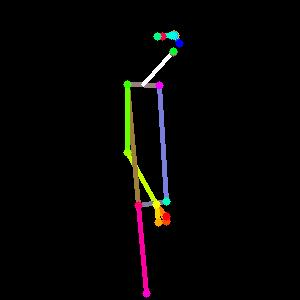

In [15]:
im = Image.open("/kaggle/input/mermer/mer.jpg") 
im

In [25]:
generator = torch.manual_seed(0)

out_image = pipe(
    ['mermaid in dress sitting on a tree'],
    [im],
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"],
    generator=generator,
    num_inference_steps=20,).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

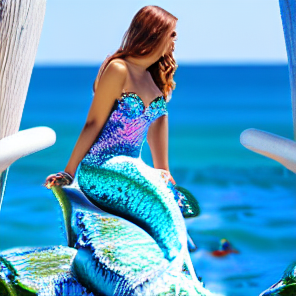

In [26]:
out_image

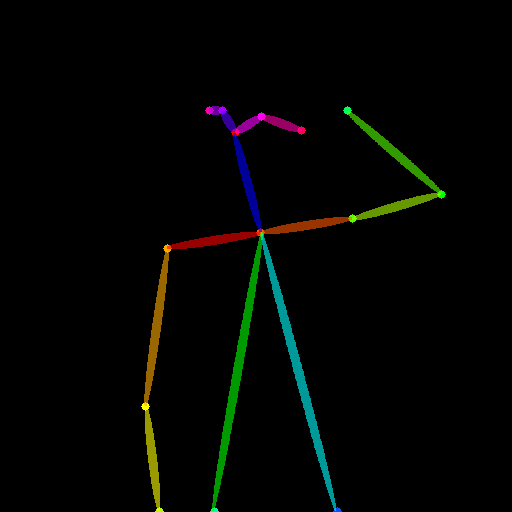

In [8]:
im = Image.open("/kaggle/input/missis/mis.png") 
im

In [9]:
generator = torch.manual_seed(0)

out_image = pipe(
    ['lprincess standing in mysterious river'],
    [im],
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"],
    generator=generator,
    num_inference_steps=20,).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

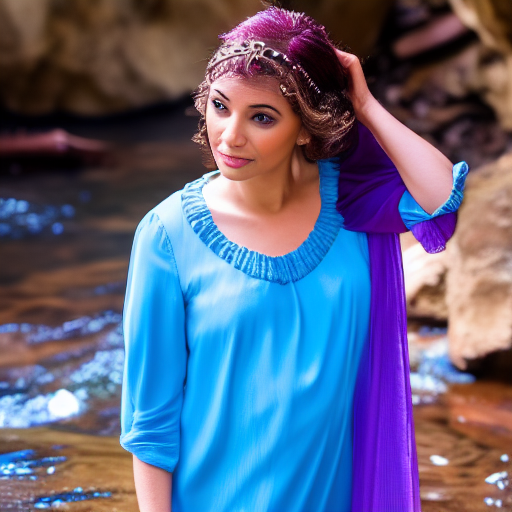

In [10]:
out_image

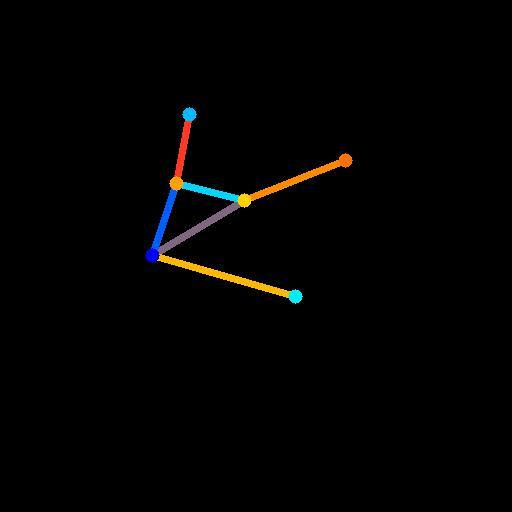

In [11]:
im = Image.open("/kaggle/input/smalltest/lemur.jpg") 
im

In [12]:
generator = torch.manual_seed(0)

out_image = pipe(
    ['lemur with bee body, elephant nose and red eyes'],
    [im],
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"],
    generator=generator,
    num_inference_steps=20,).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

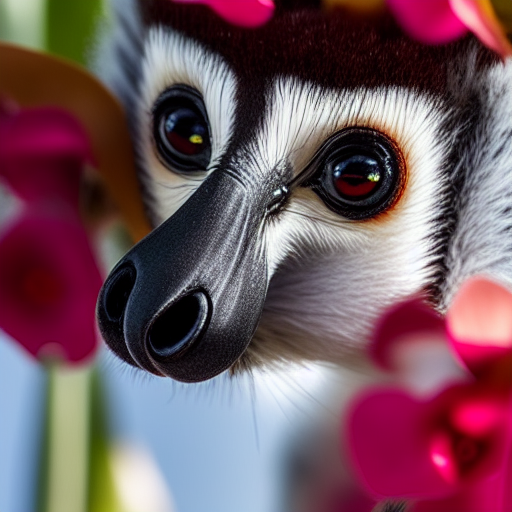

In [14]:
out_image